## Are games getting longer?

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import seaborn as sns

## practice

In [137]:
# df = pd.read_csv('../data/derived/previous-patches/lor_ranked_data_all_live_3_06_7.csv', usecols=['game_start_time_utc', 'total_turn_count']).dropna()
# df['game_start_time_utc'] = pd.to_datetime(df['game_start_time_utc'].str[:10]) # just get the dates
# df = df.pivot_table(df, index='game_start_time_utc', aggfunc=np.mean)
# df.head()

## for real

In [138]:
names = []
csvs = glob.glob('../data/derived/previous-patches/*.csv')

#make a long df
for proj in csvs:
    frame = pd.read_csv(proj, usecols=['game_start_time_utc', 'total_turn_count']).dropna()
    names.append(frame)
    james = pd.concat(names)

In [139]:
one_more = pd.read_csv('../data/raw/lor_ranked_data_all.csv', usecols=['game_start_time_utc', 'total_turn_count']).dropna()

In [140]:
df_full = pd.concat([james, one_more])

In [141]:
df_full['game_start_time_utc'] = pd.to_datetime(df_full['game_start_time_utc'].str[:10])
df_cool = df_full.pivot_table(df_full, index='game_start_time_utc', aggfunc=np.mean)

In [142]:
df_full.shape

(6677809, 2)

In [143]:
df_cool

,total_turn_count
game_start_time_utc,
2022-02-15,26.633272
2022-02-16,25.388801
2022-02-17,25.841846
2022-02-18,26.718562
2022-02-19,27.225122
...,...
2022-06-01,26.373877
2022-06-02,26.021530
2022-06-03,26.089985


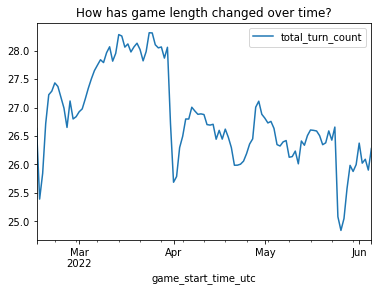

In [144]:
fig, ax = plt.subplots() # graph to see if you're missing any dates
plt.title('How has game length changed over time?')
plt.xlabel('test')
df_cool.plot(ax=ax, kind='line')
plt.savefig(f'LMAO.png', bbox_inches="tight", dpi=300, transparent=False)